4.7.3 频率域滤波步骤小结

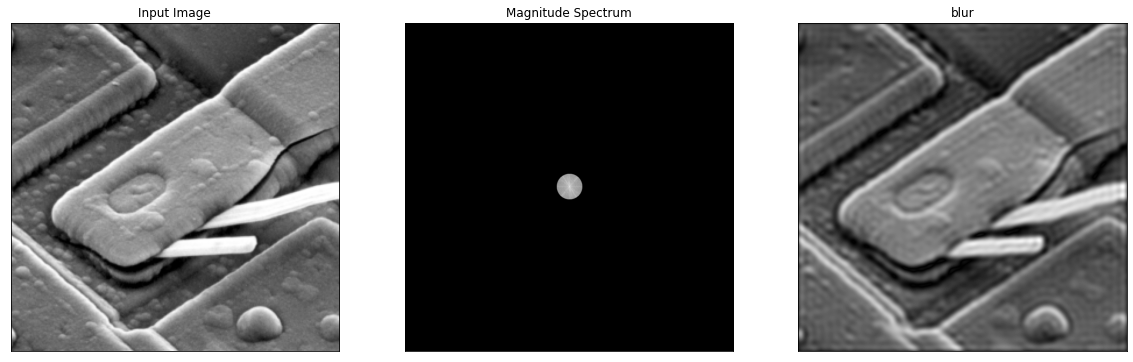

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image = cv2.imread(r"images/Fig0431(d)(blown_ic_crop).tif")
image_gary = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#填充0
rows, cols = image_gary.shape
image_full = np.zeros((2*rows, 2*cols))
image_full[:rows, :cols] = image_gary

dft = cv2.dft(np.float32(image_full), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

#频率域计算
mask = np.zeros((2*rows, 2*cols, 2))
#mask[rows-80 : rows+80, cols-80 : cols+80] = 1
for i in range(2*rows):
    for j in range(2*cols):
        if np.sqrt(np.power(i-rows, 2) + np.power(j-cols, 2)) < 80:
            mask[i, j] = 1
#mask = 1 - mask
dft_shift = dft_shift * mask

# 傅里叶反变换
ishift = np.fft.ifftshift(dft_shift)
iimage = cv2.idft(ishift)
iimage = cv2.magnitude(iimage[:, :, 0], iimage[:, :, 1])

# 计算后的幅值
magnitude_spectrum = np.log(1 + cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))



plt.figure(figsize=(20, 10))
plt.subplot(131),plt.imshow(image_gary, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, "gray")
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(iimage[:rows, :cols], "gray")
plt.title('blur'), plt.xticks([]), plt.yticks([])
plt.show()

4.8.1理想低通滤波器

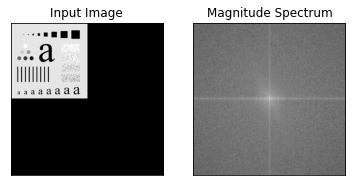

[[9.81241339 9.77316292 9.56319432 ... 9.210674   9.56319432 9.77316292]
 [9.83255993 9.65983964 9.38334754 ... 9.4727018  9.68472241 9.87467087]
 [9.81088368 9.50550274 9.0030056  ... 9.65644252 9.74873732 9.88003047]
 ...
 [9.6322201  9.71237254 9.6596222  ... 7.80676747 8.21843577 9.19280608]
 [9.81088368 9.88003047 9.74873732 ... 8.46716266 9.0030056  9.50550274]
 [9.83255993 9.87467087 9.68472241 ... 8.93251737 9.38334754 9.65983964]]
18.401815600880497


In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image = cv2.imread(r"images/Fig0441(a)(characters_test_pattern).tif")
image_gary = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#填充0
rows, cols = image_gary.shape
#nrows = cv2.getOptimalDFTSize(rows)
#ncols = cv2.getOptimalDFTSize(cols)
image_full = np.zeros((2*rows, 2*cols))
image_full[:rows, :cols] = image_gary


dft = cv2.dft(np.float32(image_full), flags=cv2.DFT_COMPLEX_OUTPUT)
#dft = np.fft.fft2(image_full)
dft_shift = np.fft.fftshift(dft)

# 计算幅值
magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
#magnitude_spectrum = np.log(np.abs(dft_shift))
#cv2.normalize(magnitude_spectrum, magnitude_spectrum, 0, 255, cv2.NORM_MINMAX)

plt.subplot(121),plt.imshow(image_full, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, "gray")
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
print(magnitude_spectrum)
print(np.max(magnitude_spectrum))

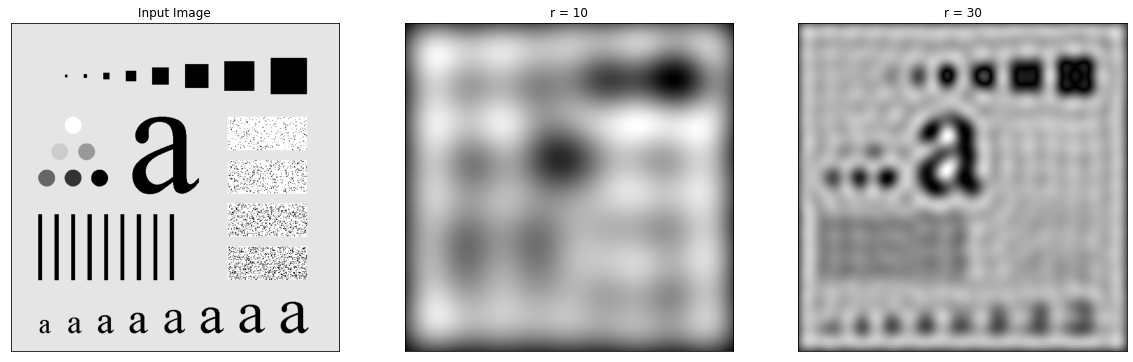

In [50]:
# 理想低通
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_idft(img_gray, mask):
    rows, cols = img_gray.shape
    img_gray = cv2.copyMakeBorder(image_gary, 0, rows, 0, cols, cv2.BORDER_CONSTANT, 0)
    img_dft = cv2.dft(np.float32(img_gray), flags=cv2.DFT_COMPLEX_OUTPUT)
    img_dft_shift = np.fft.fftshift(img_dft)
    img_dft_shift = img_dft_shift * mask
    img_idft = cv2.idft(np.fft.ifftshift(img_dft_shift))
    img_idft = cv2.magnitude(img_idft[:, :, 0], img_idft[:, :, 1])
    return img_idft[:rows, :cols]

def get_mask(img, r):
    rows, cols = img.shape
    mask = np.zeros((2*rows, 2*cols, 2))
    for i in range(2*rows):
        for j in range(2*cols):
            if np.sqrt(np.power(i-rows, 2) + np.power(j-cols, 2)) < r:
                mask[i, j] = 1
    #mask = 1 - mask
    return mask



image = cv2.imread(r"images/Fig0441(a)(characters_test_pattern).tif")
image_gary = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mask = get_mask(image_gary, 10)
image_1 = get_idft(image_gary.copy(), mask)

mask = get_mask(image_gary, 30)
image_2 = get_idft(image_gary.copy(), mask)

plt.figure(figsize=(20, 10))
plt.subplot(131),plt.imshow(image_gary, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(image_1, "gray")
plt.title('r = 10'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_2, "gray")
plt.title('r = 30'), plt.xticks([]), plt.yticks([])
plt.show()
